<a href="https://colab.research.google.com/github/AlfredXNet/Stroke-Prediction-App/blob/main/notebooks/stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and import libraries**




In [1]:
# Install the requisite libraries
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
# Importing the requisite libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# **Load and explore the dataset**

In [4]:
# Loading the dataset
Stroke_prediction = pd.read_csv('/stroke_prediction_dataset.csv')

In [6]:
# Displaying the first few records
Stroke_prediction.head(2)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke


In [7]:
# Displaying the concise summary of the dataframe
Stroke_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

# Handle missing **values**

In [8]:
# Filling missing values in 'Symptoms' column with 'unknown' value
Stroke_prediction['Symptoms'] = Stroke_prediction['Symptoms'].fillna('Unknown')

# **Visualize data**

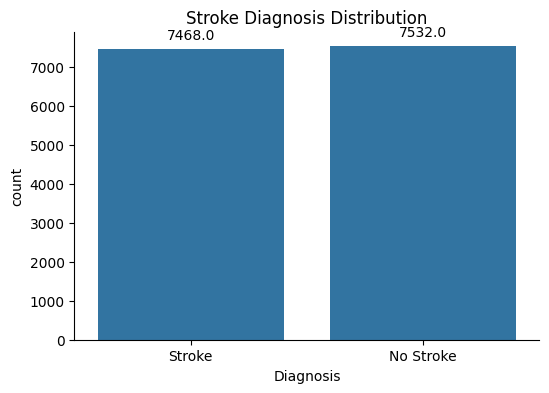

In [13]:
# Distribution of Target Variable (Column: Diagnosis)
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Diagnosis', data=Stroke_prediction)
plt.title('Stroke Diagnosis Distribution')

# Remove top and right spines to prevent overlap
sns.despine(top=True, right=True)

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

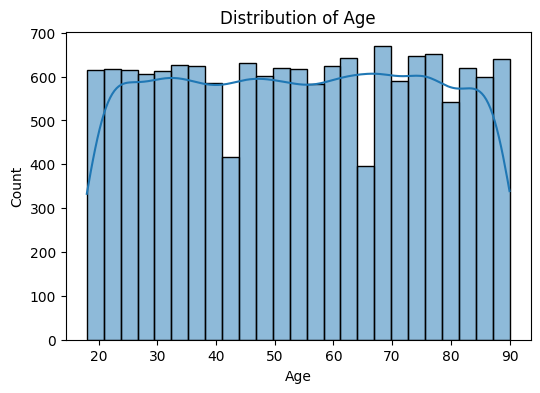

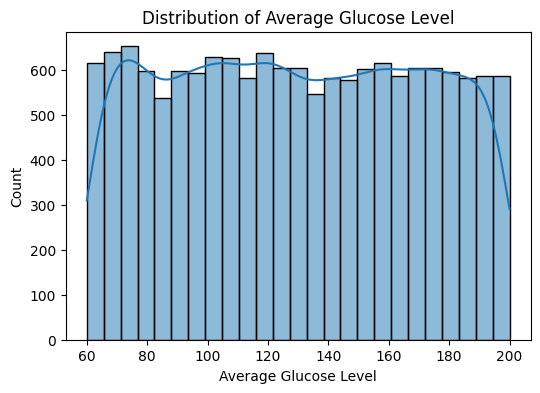

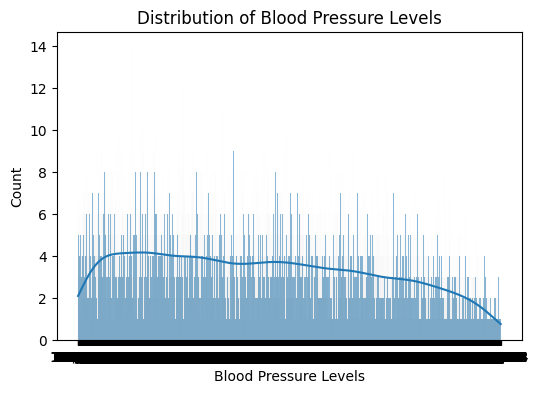

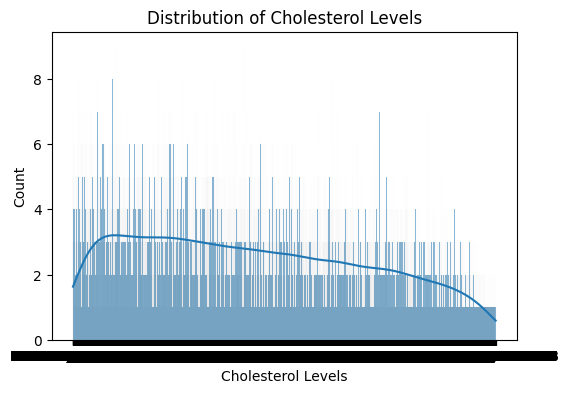

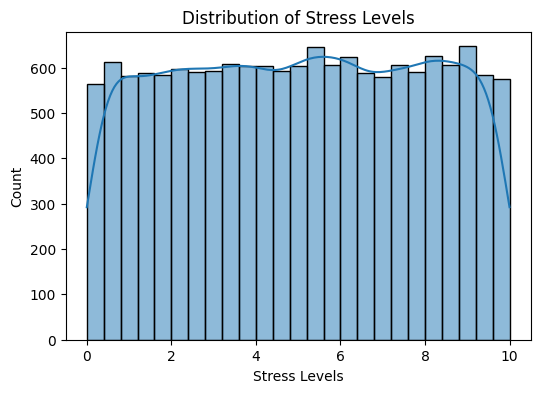

In [14]:
# Numeric Features (Age, Average Glucose Level, Blood Pressure Levels, Cholesterol Levels, Stress Levels)
numeric_cols = ['Age', 'Average Glucose Level', 'Blood Pressure Levels', 'Cholesterol Levels', 'Stress Levels']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(Stroke_prediction[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
